<a href="https://colab.research.google.com/github/dindahanifa/mechine_learning/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bagian 1 – Deteksi Wajah Menggunakan OpenCV (Contoh code)**

Mengimpor library

In [ ]:
import cv2
import matplotlib.pyplot as plt

Konfigurasi input

In [20]:
from google.colab import files
uploaded = files.upload()

Saving data.jpeg to data.jpeg


In [21]:
IMG_PATH = "data.jpeg"

Muat gambar


In [22]:
img = cv2.imread(IMG_PATH)
if img is None:
    raise FileNotFoundError(f"Gambar '{IMG_PATH}' tidak ditemukan. "
                            "Pastikan sudah di-upload ke workspace.")

Konversi ke RGB untuk RetinaFace

In [23]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Deteksi wajah dengan RetinaFace

In [24]:
faces_retina = RetinaFace.detect_faces(img_rgb)

In [16]:
!pip install retina-face
from retinaface import RetinaFace

Sumber Haar Cascade bawaan OpenCV

In [25]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +                                "haarcascade_frontalface_default.xml")

Preprocessing & deteksi

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1,
                                      minNeighbors=5, minSize=(30, 30))

Gambar kotak pada wajah

In [32]:
if isinstance(faces_retina, dict):  # jika ada wajah terdeteksi
    for key, face in faces_retina.items():
        facial_area = face["facial_area"]  # [x1, y1, x2, y2]
        x1, y1, x2, y2 = facial_area

        # Gambar kotak hijau
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Tambahkan label angka urutan wajah
        cv2.putText(img_rgb, f"Wajah {key}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
else:
    print("⚠️ Tidak ada wajah terdeteksi.")

Gambar kotak hijau

In [29]:
cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

array([[[ 36,  68,  79],
        [ 36,  68,  79],
        [ 36,  68,  79],
        ...,
        [127, 128, 114],
        [129, 130, 114],
        [131, 132, 116]],

       [[ 65,  99, 111],
        [ 65,  99, 109],
        [ 64,  98, 110],
        ...,
        [127, 128, 114],
        [129, 130, 114],
        [131, 132, 116]],

       [[ 82, 118, 132],
        [ 82, 118, 130],
        [ 82, 118, 132],
        ...,
        [127, 128, 114],
        [129, 130, 114],
        [131, 132, 116]],

       ...,

       [[188, 172, 136],
        [191, 175, 139],
        [192, 176, 140],
        ...,
        [200, 191, 158],
        [199, 190, 157],
        [195, 186, 153]],

       [[190, 174, 138],
        [193, 177, 141],
        [193, 177, 141],
        ...,
        [202, 193, 160],
        [202, 193, 160],
        [198, 189, 156]],

       [[191, 175, 139],
        [194, 178, 142],
        [195, 179, 143],
        ...,
        [204, 195, 162],
        [203, 194, 161],
        [198, 189, 156]]

Tampilkan hasil di Colab

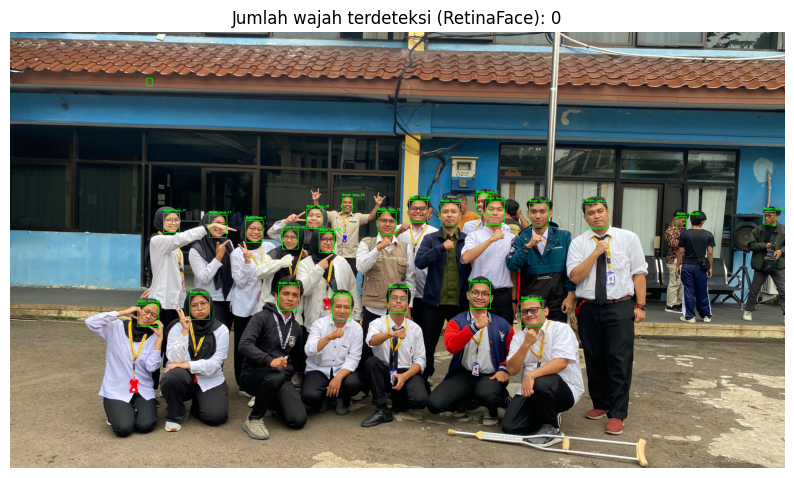

In [33]:
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Jumlah wajah terdeteksi (RetinaFace): {len(faces) if isinstance(faces, dict) else 0}")
plt.show()

**Bagian 2 – Ekstraksi Teks Menggunakan Tesseract OCR (Contoh Code)**

Mengimpor library

In [36]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [37]:
!pip install pytesseract

Konfigurasi input

In [60]:
from google.colab import files
uploaded = files.upload()

Saving jalan.jpg to jalan.jpg


In [66]:
IMG_PATH = "jalan.jpg"

Konversi ke grayscale

In [67]:
# Muat gambar untuk bagian 2
img = cv2.imread(IMG_PATH)
if img is None:
    raise FileNotFoundError(f"Gambar '{IMG_PATH}' tidak ditemukan. "
                            "Pastikan sudah di-upload ke workspace.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Thresholding (buat teks lebih jelas)

In [68]:
thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    31, 10
)

Jalankan OCR

In [69]:
data = pytesseract.image_to_data(thresh, lang='eng', output_type=pytesseract.Output.DICT)

Gabungkan hasil OCR jadi teks lengkap

In [70]:
text_result = "\n".join([data['text'][i] for i in range(len(data['text'])) if data['text'][i].strip() != ''])

Gambar kotak di sekitar teks

In [71]:
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:  # confidence minimal 60%
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, data['text'][i], (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

Tampilkan hasil

In [72]:
print("=== Hasil OCR (teks lengkap) ===")
print(text_result)

=== Hasil OCR (teks lengkap) ===



Tampilkan gambar

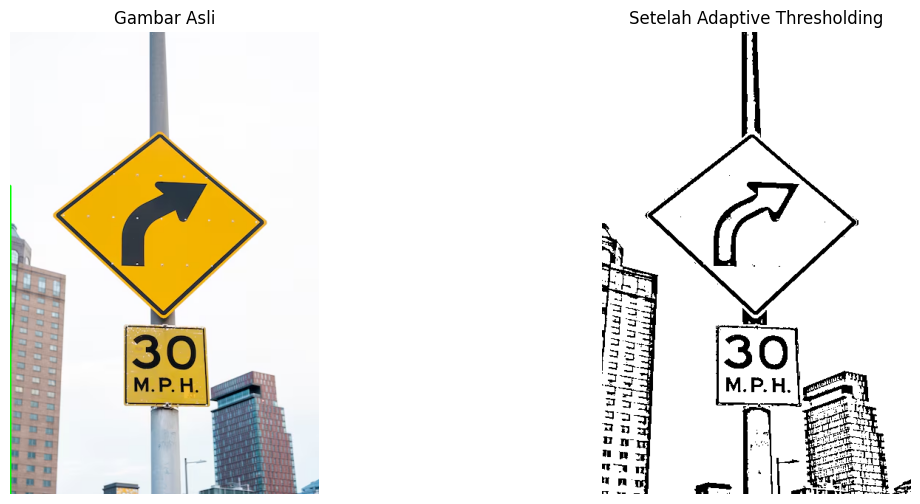

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(thresh, cmap='gray')
ax[1].set_title("Setelah Adaptive Thresholding")
ax[1].axis("off")

plt.show()

**Bagian 3 - Ekstraksi Teks Menggunakan EasyOCR (Contoh Code)**

Mengimpor library

In [77]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import easyocr
import torch, torchvision, torchaudio

Konfigurasi input

In [89]:
from google.colab import files
uploaded = files.upload()

Saving tanda.jpeg to tanda (1).jpeg


In [90]:
IMG_PATH = "tanda.jpeg"

Jalankan OCR dengan EasyOCR

In [91]:
reader = easyocr.Reader(['en', 'id'])  # Bisa pakai bahasa Inggris dan Indonesia
results = reader.readtext(IMG_PATH)

Tampilkan hasil teks dan tingkat kepercayaan

In [92]:
print("=== HASIL EKSTRAKSI TEKS DENGAN EASYOCR ===\n")
for (bbox, text, prob) in results:
    print(f"{text} (Confidence: {prob:.2f})")

=== HASIL EKSTRAKSI TEKS DENGAN EASYOCR ===

NEXT (Confidence: 1.00)
MILE (Confidence: 1.00)


(Opsional) Tampilkan hasil OCR langsung pada gambar

In [93]:
import cv2
from matplotlib import pyplot as plt

Baca dan tampilkan gambar

In [94]:
img = cv2.imread(IMG_PATH) # Load image for this section
for (bbox, text, prob) in results:
    # Bbox is a list of 4 points, convert to rectangle format (x, y, w, h)
    (x1, y1), (x2, y2), (x3, y3), (x4, y4) = bbox
    x = int(min(x1, x2, x3, x4))
    y = int(min(y1, y2, y3, y4))
    w = int(max(x1, x2, x3, x4) - x)
    h = int(max(y1, y2, y3, y4) - y)

    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

Ambil koordinat kotak

In [95]:
    top_left = tuple([int(val) for val in bbox[0]])
    bottom_right = tuple([int(val) for val in bbox[2]])

Gambar kotak dan teks

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 16,  56,  38],
        [ 31,  71,  53],
        [ 33,  71,  53],
        ...,
        [ 82,  95,  97],
        [ 94, 102, 101],
        [116, 123, 120]],

       [[ 20,  56,  40],
        [ 30,  66,  50],
        [ 25,  61,  45],
        ...,
        [ 77,  90,  92],
        [ 68,  76,  75],
        [ 91,  96,  94]],

       [[ 24,  60,  44],
        [ 25,  61,  45],
        [ 15,  51,  35],
        ...,
        [ 62,  75,  77],
        [ 44,  52,  51],
        [ 68,  73,  71]]], dtype=uint8)
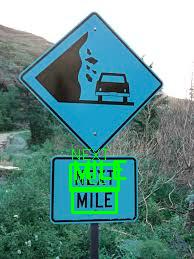

In [96]:
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(img, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

Konversi warna BGR ke RGB untuk ditampilkan

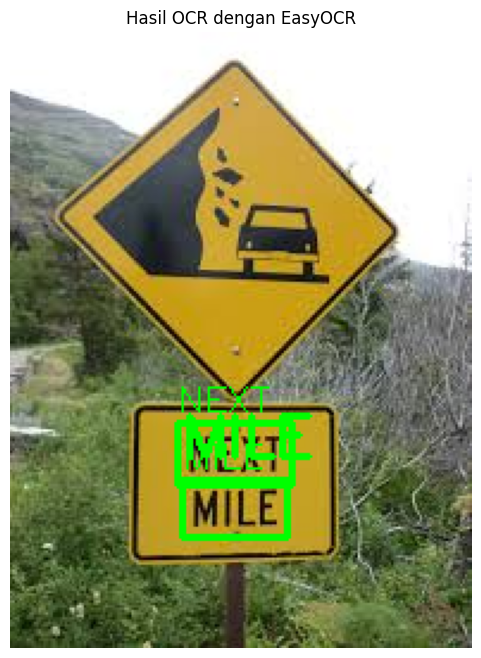

In [97]:
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Hasil OCR dengan EasyOCR")
plt.show()